# Garch Model

## Importing

In [1]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

 ## Nifty 50 Volitality Prediction

In [12]:
df = pd.read_csv("NIFTY 50_Historical_PR_12112004to12112024.csv")

In [13]:
df.head

<bound method NDFrame.head of      Index Name         Date      Open      High       Low     Close
0      NIFTY 50  11 Nov 2024  24087.25  24336.80  24004.60  24141.30
1      NIFTY 50  08 Nov 2024  24207.70  24276.15  24066.65  24148.20
2      NIFTY 50  07 Nov 2024  24489.60  24503.35  24179.05  24199.35
3      NIFTY 50  06 Nov 2024  24308.75  24537.60  24204.05  24484.05
4      NIFTY 50  05 Nov 2024  23916.50  24229.05  23842.75  24213.30
...         ...          ...       ...       ...       ...       ...
4956   NIFTY 50  19 Nov 2004   1891.95   1898.15   1869.35   1872.35
4957   NIFTY 50  18 Nov 2004   1890.45   1895.30   1880.80   1892.05
4958   NIFTY 50  17 Nov 2004   1879.05   1892.15   1874.35   1888.65
4959   NIFTY 50  16 Nov 2004   1872.80   1881.40   1862.80   1879.00
4960   NIFTY 50  12 Nov 2004   1871.90   1885.05   1866.75   1872.95

[4961 rows x 6 columns]>

In [14]:
df.columns


Index(['Index Name', 'Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [15]:
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'])
df

,Index Name,Date,Open,High,Low,Close
0,NIFTY 50,2024-11-11,24087.25,24336.80,24004.60,24141.30
1,NIFTY 50,2024-11-08,24207.70,24276.15,24066.65,24148.20
2,NIFTY 50,2024-11-07,24489.60,24503.35,24179.05,24199.35
3,NIFTY 50,2024-11-06,24308.75,24537.60,24204.05,24484.05
4,NIFTY 50,2024-11-05,23916.50,24229.05,23842.75,24213.30
...,...,...,...,...,...,...
4956,NIFTY 50,2004-11-19,1891.95,1898.15,1869.35,1872.35
4957,NIFTY 50,2004-11-18,1890.45,1895.30,1880.80,1892.05
4958,NIFTY 50,2004-11-17,1879.05,1892.15,1874.35,1888.65
4959,NIFTY 50,2004-11-16,1872.80,1881.40,1862.80,1879.00


In [16]:
df = df.sort_values('Date')

In [17]:
df.set_index('Date', inplace=True)

In [18]:
returns = 100 * df['Close'].pct_change().dropna()
print(returns.head())

Date
2004-11-16    0.323020
2004-11-17    0.513571
2004-11-18    0.180023
2004-11-19   -1.041199
2004-11-22    0.053409
Name: Close, dtype: float64


In [19]:
returns.index[-1]

Timestamp('2024-11-11 00:00:00')

Text(0.5, 1.0, 'Nifty 50 retuns')

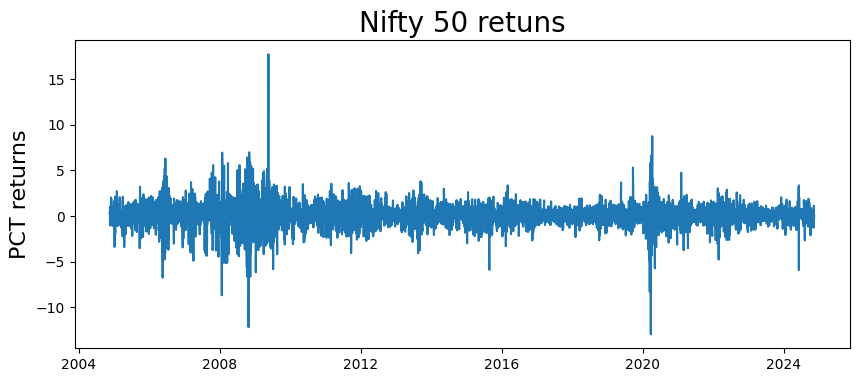

In [20]:
plt.figure(figsize = (10, 4))
plt.plot(returns)
plt.ylabel("PCT returns", fontsize = 16)
plt.title('Nifty 50 retuns', fontsize = 20)

In [21]:
# Check if the first date in df is missing in returns
missing_dates = df.index.difference(returns.index)

# Print the missing dates (if any)
print("Missing dates:", missing_dates)


Missing dates: DatetimeIndex(['2004-11-12'], dtype='datetime64[ns]', name='Date', freq=None)


In [22]:
df.drop(index='2004-11-12', inplace=True)

## PACF

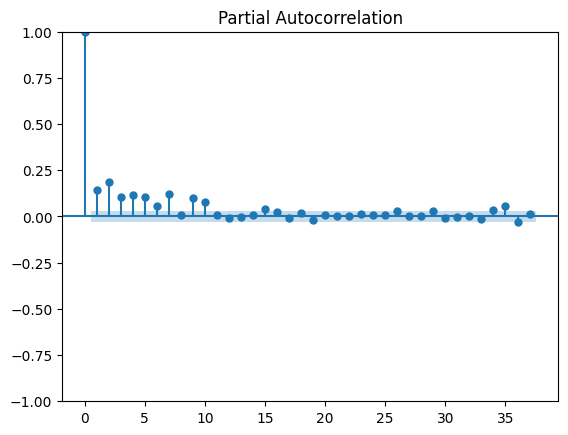

In [23]:
plot_pacf(returns**2)
plt.show()

## GRACH (5, 5)

In [24]:
model = arch_model(returns, p = 5, q = 5)
model_fit = model.fit()

Iteration:      1,   Func. Count:     14,   Neg. LLF: 36165.98306917402
Iteration:      2,   Func. Count:     31,   Neg. LLF: 1838372.8584462074
Iteration:      3,   Func. Count:     45,   Neg. LLF: 8154.91152390645
Iteration:      4,   Func. Count:     61,   Neg. LLF: 12628.977978092193
Iteration:      5,   Func. Count:     76,   Neg. LLF: 7686.172147693751
Iteration:      6,   Func. Count:     90,   Neg. LLF: 7792.904194476075
Iteration:      7,   Func. Count:    104,   Neg. LLF: 7791.897418150614
Iteration:      8,   Func. Count:    118,   Neg. LLF: 8602.428329514616
Iteration:      9,   Func. Count:    133,   Neg. LLF: 8121.28621835806
Iteration:     10,   Func. Count:    147,   Neg. LLF: 7518.107916331501
Iteration:     11,   Func. Count:    162,   Neg. LLF: 7569.275931581399
Iteration:     12,   Func. Count:    176,   Neg. LLF: 7429.134093057281
Iteration:     13,   Func. Count:    190,   Neg. LLF: 7408.98801342111
Iteration:     14,   Func. Count:    204,   Neg. LLF: 7401.262954

In [25]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7400.44
Distribution:                  Normal   AIC:                           14824.9
Method:            Maximum Likelihood   BIC:                           14903.0
                                        No. Observations:                 4960
Date:                Thu, Nov 14 2024   Df Residuals:                     4959
Time:                        17:01:24   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0849  1.405e-02      6.041  1.529e-09 [5.733e-02,  0.112]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0437  4.188e-02      1.044      0.297 [-3.837e-02,  0.126]
alpha[1]       0.0975  2.235e-02      4.362  1.287e-05  [5.370e-02,  0.141]
alpha[2]       0.1025  5.579e-02      1.838  6.609e-02 [-6.817e-03,  0.212]
alpha[3]   2.6248e-08  7.879e-02  3.331e-07      1.000    [ -0.154,  0.154]
alpha[4]       0.0226      0.114      0.199      0.842    [ -0.200,  0.245]
alpha[5]   7.2161e-09  5.721e-02  1.261e-07      1.000    [ -0.112,  0.112]
beta[1]    9.1648e-09      0.604  1.518e-08      1.000    [ -1.183,  1.183]
beta[2]        0.6643      0.704      0.943      0.346    [ -0.716,  2.044]
beta[3]    5.5846e-09      0.793  7.038e-09      1.000    [ -1.555,  1.555]
beta[4]    1.0738e-07      0.493  2.178e-07      1.000    [ -0.967,  0.967]
beta[5]        0.0924      0.479      0.193      0.847    [ -0.846,  1.031]
===========================================================================

Covariance estimator: robust
"""

## GRACH(2, 2)

In [26]:
model = arch_model(returns, p = 2, q = 2)
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 42138.48693736936
Iteration:      2,   Func. Count:     20,   Neg. LLF: 29136.647762187098
Iteration:      3,   Func. Count:     31,   Neg. LLF: 1525783411.8107736
Iteration:      4,   Func. Count:     39,   Neg. LLF: 7590.611946064684
Iteration:      5,   Func. Count:     47,   Neg. LLF: 2357363192.914316
Iteration:      6,   Func. Count:     55,   Neg. LLF: 7416.057770642061
Iteration:      7,   Func. Count:     63,   Neg. LLF: 7542.1433475518
Iteration:      8,   Func. Count:     72,   Neg. LLF: 7402.327533823126
Iteration:      9,   Func. Count:     79,   Neg. LLF: 7414.7878218009855
Iteration:     10,   Func. Count:     88,   Neg. LLF: 7596.119282253162
Iteration:     11,   Func. Count:     97,   Neg. LLF: 7402.361572863783
Iteration:     12,   Func. Count:    105,   Neg. LLF: 7402.048003175828
Iteration:     13,   Func. Count:    112,   Neg. LLF: 7402.046325392029
Iteration:     14,   Func. Count:    119,   Neg. LLF: 7402.0462

In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7402.05
Distribution:                  Normal   AIC:                           14816.1
Method:            Maximum Likelihood   BIC:                           14855.1
                                        No. Observations:                 4960
Date:                Thu, Nov 14 2024   Df Residuals:                     4959
Time:                        17:01:43   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0849  1.417e-02      5.992  2.071e-09 [5.714e-02,  0.113]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0390  1.109e-02      3.520  4.322e-04  [1.729e-02,6.075e-02]
alpha[1]       0.0861  1.645e-02      5.232  1.673e-07    [5.384e-02,  0.118]
alpha[2]       0.1094  1.886e-02      5.799  6.691e-09    [7.241e-02,  0.146]
beta[1]    3.7020e-03  3.995e-02  9.267e-02      0.926 [-7.459e-02,8.199e-02]
beta[2]        0.7825  3.954e-02     19.790  3.608e-87      [  0.705,  0.860]
=============================================================================

Covariance estimator: robust
"""

## Rolling Predictions

In [28]:
rolling_predictions = []

testsize = 4959

for i in range(testsize):
    train = returns[:-(testsize - i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp="off")
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1, :][0]))

print("Rolling predictions:", rolling_predictions)

C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\volatility.py:1215: RuntimeWarning: invalid value encountered in scalar divide
  scale = np.mean(resids**2) / (target ** (2.0 / power))
C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\distribution.py:449: RuntimeWarning: divide by zero encountered in log
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\distribution.py:449: RuntimeWarning: invalid value encountered in divide
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\distribution.py:449: RuntimeWarning: divide by zero encountered in divide
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\di

Rolling predictions: [0.0, 0.09527560670520295, 0.15846935852722532, 0.7358567997600578, 1.0924899053869364, 0.001368778625947536, 0.9239898340308051, 0.5477457091375237, 0.9533460404024661, 0.9019135287604685, 0.837951373629275, 0.9359713470213888, 0.9160681176915919, 0.8918985758286441, 0.832912203681387, 0.896565574528484, 0.8287837059854641, 0.9295629669634041, 0.8858011754306682, 0.8705693717436023, 0.8538274838746802, 0.8186968672611784, 0.9007882776480871, 0.8509485145288315, 0.83174264967136, 0.8294343894167273, 0.8083451065132118, 0.7972937544095505, 0.7838748081821949, 0.7686921101448683, 0.7569054323910301, 0.7469729577734158, 0.7558954072894231, 0.7823800419400531, 0.7860376390751175, 0.9350222368765343, 3.571979277787365, 1.9977874519800662, 1.0123784470034358, 1.828316054357519, 1.792146808981546, 2.1561315109116017, 2.027838938945327, 1.4904854580912221, 0.795106535352805, 0.6487981980826671, 0.7372370342905055, 0.6735061038006663, 1.0829694997346497, 1.1350289586041769,

In [29]:
rolling_predictions = pd.Series(rolling_predictions, index = returns.index[-testsize:])

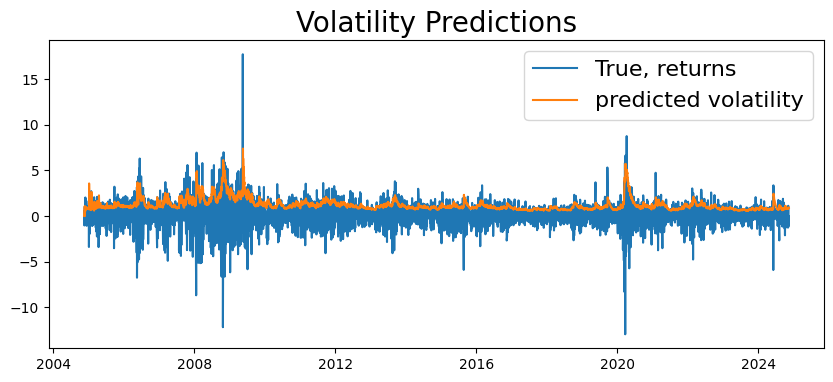

In [30]:
plt.figure(figsize = (10, 4))
true,  = plt.plot(returns[-testsize:])
preds, = plt.plot(rolling_predictions)
plt.title("Volatility Predictions", fontsize = 20)
plt.legend(["True, returns", "predicted volatility"], fontsize = 16)


In [31]:
train = returns
model = arch_model(train, p = 1, q = 0)
model_fit = model.fit(disp = "off")

In [32]:
pred = model_fit.forecast(horizon = 7)
future_dates = [df.index[-1] + timedelta(days = i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index = future_dates)

Text(0.5, 1.0, 'Volatility prediction - next 7 days')

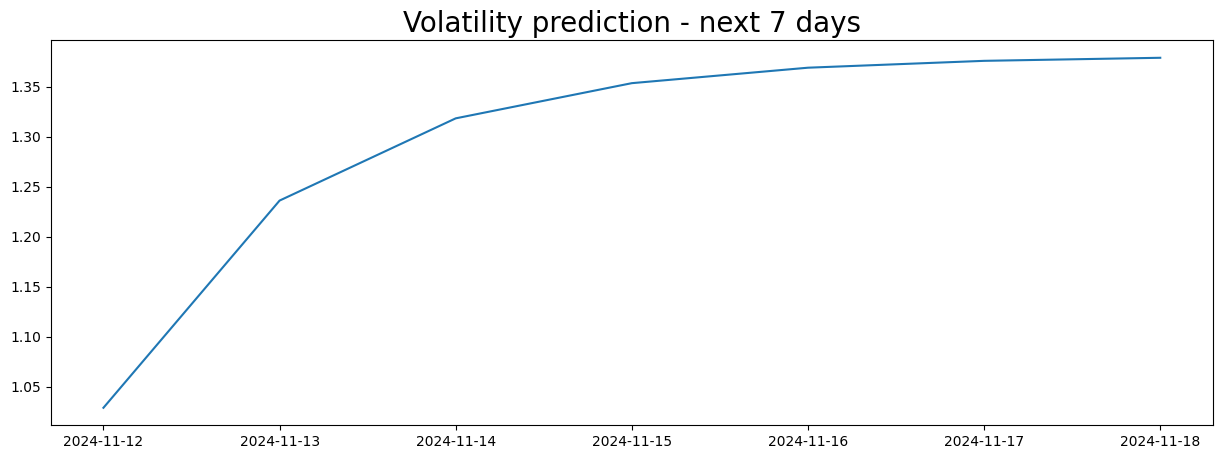

In [34]:
plt.figure(figsize = (15, 5))
plt.plot(pred)
plt.title("Volatility prediction - next 7 days", fontsize = 20)

## Prediction with Rolling WIndow

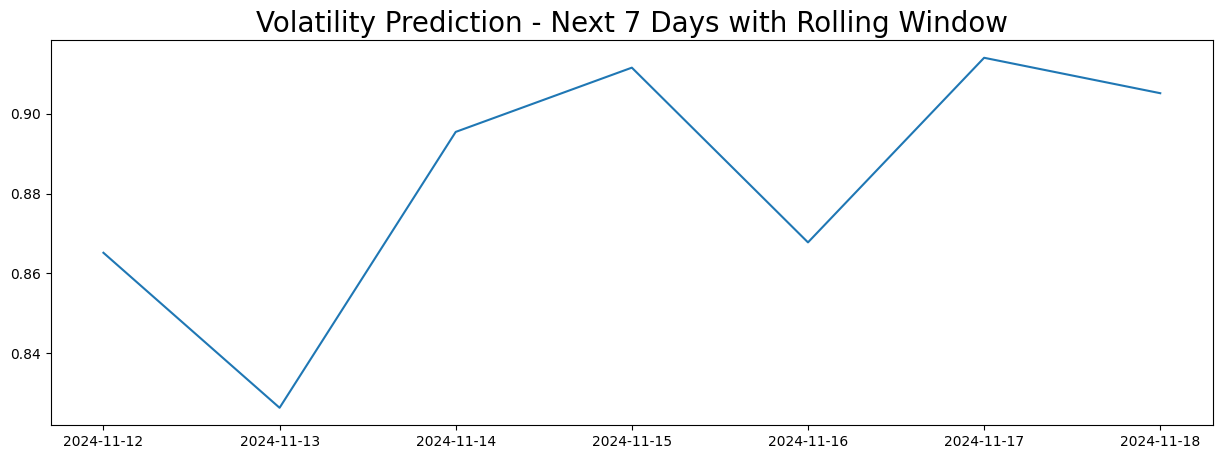

In [35]:
# Rolling forecast for the next 7 days
rolling_7day_forecast = []
train_data = returns  # Full dataset for training

for day in range(7):
    # Fit the model on current data
    model = arch_model(train_data, p=2, q=2)  # Experiment with (1,1) if flatness persists
    model_fit = model.fit(disp="off")

    # Forecast the next day's volatility
    forecast = model_fit.forecast(horizon=1)
    next_day_volatility = np.sqrt(forecast.variance.values[-1, :][0])
    rolling_7day_forecast.append(next_day_volatility)

    # Append a synthetic return for this day to update the training set
    # This simulates that we're moving one day forward each iteration
    synthetic_return = np.random.normal(0, next_day_volatility)  # Generate based on predicted volatility
    new_data = pd.Series([synthetic_return], index=[df.index[-1] + timedelta(days=1)])
    train_data = pd.concat([train_data, new_data])

# Create a series for plotting
future_dates = [df.index[-1] + timedelta(days=i + 1) for i in range(7)]
rolling_7day_forecast = pd.Series(rolling_7day_forecast, index=future_dates)

# Plot the 7-day volatility prediction with fluctuations
plt.figure(figsize=(15, 5))
plt.plot(rolling_7day_forecast)
plt.title("Volatility Prediction - Next 7 Days with Rolling Window", fontsize=20)
plt.show()
